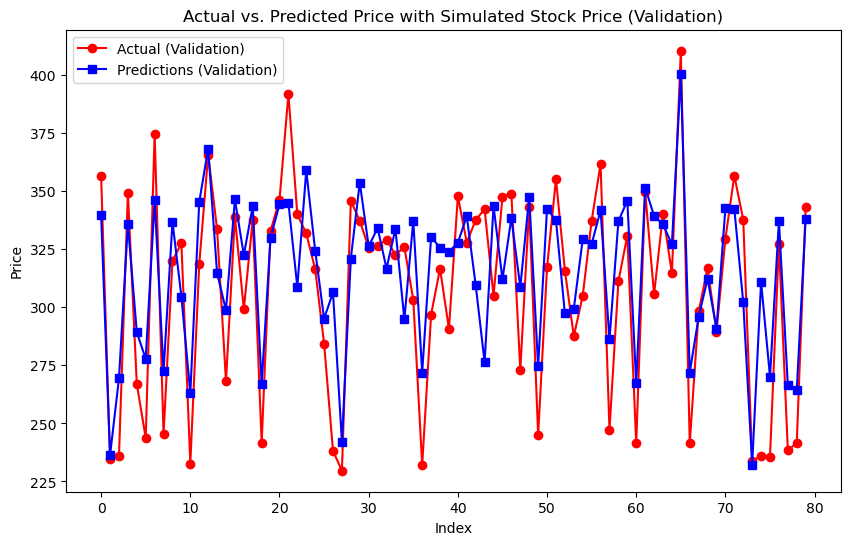

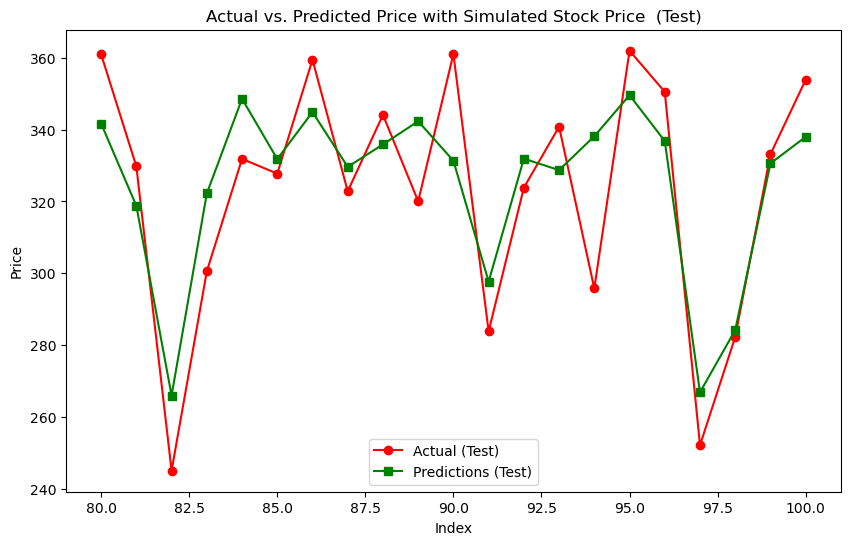

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

# Load the dataset
file_path = r'C:\Users\DELL\Downloads\simulated_data_final.csv'
data = pd.read_csv(file_path)

# Feature engineering: Extract year, month, and day from the 'Date' column
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Select features and target variable
X = data[['Year', 'Month', 'Day']]
y = data['Price']  # Assuming 'Price' is the correct target variable column

# Split the data into training and a combined set of validation and test sets
X_train, X_combined, y_train, y_combined = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the combined validation and test set into validation and test sets
X_validation, X_test, y_validation, y_test = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)

# Initialize KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=3)

# Train the model
knn_regressor.fit(X_train, y_train)

# Make predictions on the validation set
predictions_validation = knn_regressor.predict(X_validation)

# Make predictions on the test set
predictions_test = knn_regressor.predict(X_test)

# Create index for validation and test sets
validation_index = range(len(y_validation))
test_index = range(len(y_validation), len(y_validation) + len(y_test))

# Create line plots of actual versus predicted values for validation set
plt.figure(figsize=(10, 6))
plt.plot(validation_index, y_validation, color='red', label='Actual (Validation)', marker='o')
plt.plot(validation_index, predictions_validation, color='blue', label='Predictions (Validation)', marker='s')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.title('Actual vs. Predicted Price with Simulated Stock Price (Validation)')
plt.show()

# Create line plots of actual versus predicted values for test set
plt.figure(figsize=(10, 6))
plt.plot(test_index, y_test, color='red', label='Actual (Test)', marker='o')
plt.plot(test_index, predictions_test, color='green', label='Predictions (Test)', marker='s')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.title('Actual vs. Predicted Price with Simulated Stock Price  (Test)')
plt.show()


Validation Set Results:
MSE: 681.23
MAE: 21.31
R-squared: 0.65
MAPE: 7.35%

Test Set Results:
MSE: 305.76
MAE: 14.89
R-squared: 0.73
MAPE: 4.70%


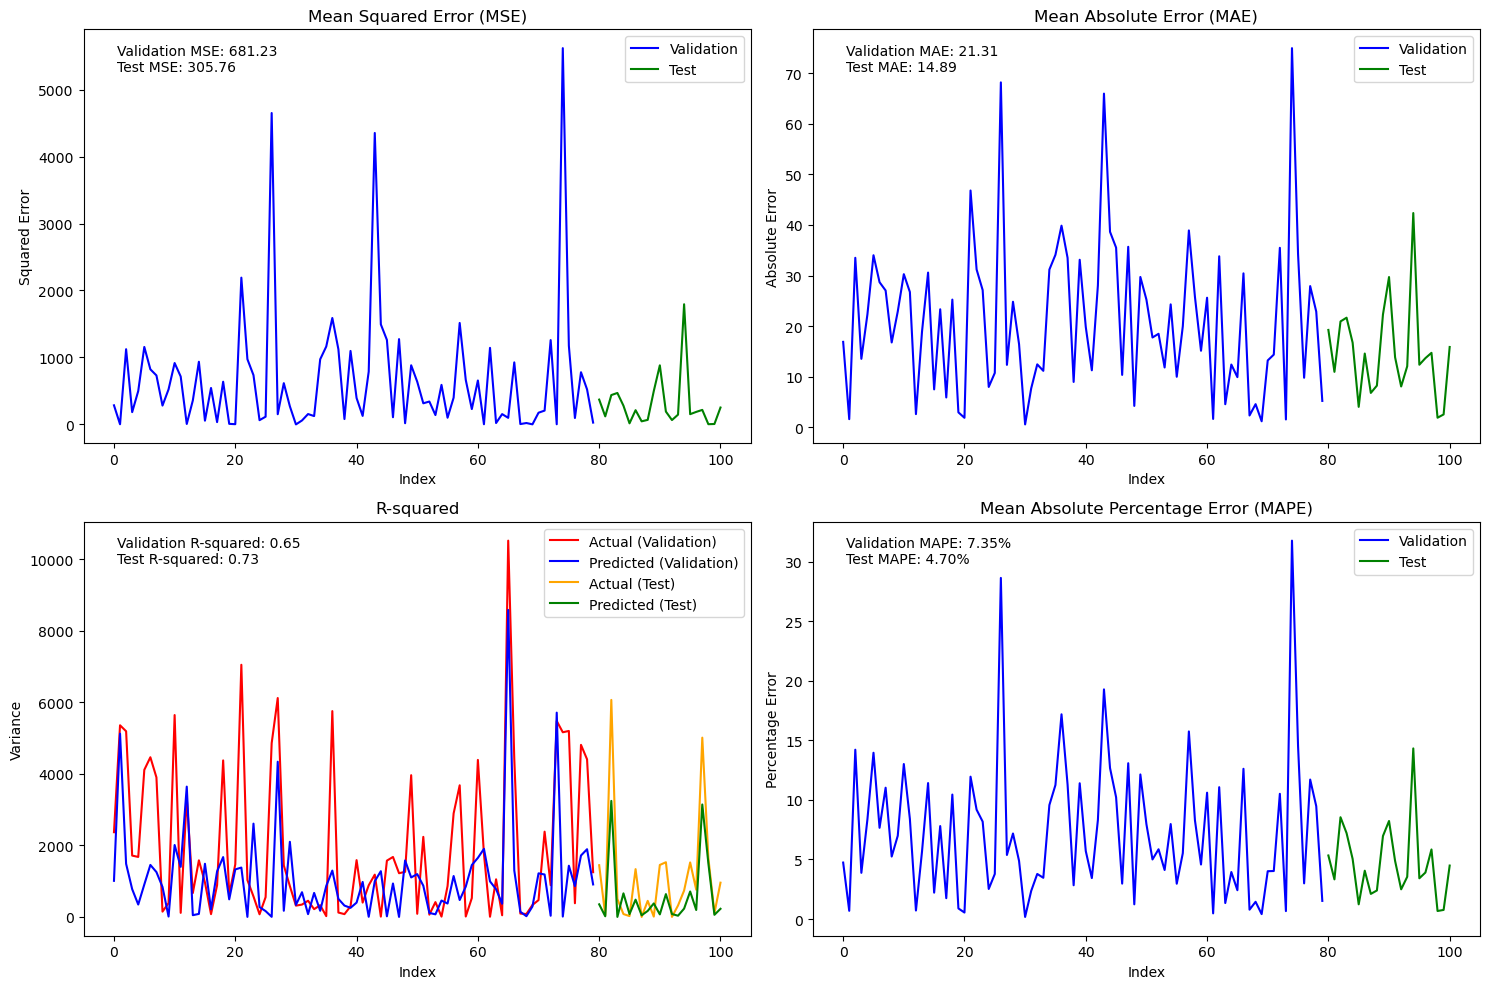

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = r'C:\Users\DELL\Downloads\simulated_data_final.csv'
data = pd.read_csv(file_path)

# Feature engineering: Extract year, month, and day from the 'Date' column
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Select features and target variable
X = data[['Year', 'Month', 'Day']]
y = data['Price']  # Assuming 'Price' is the correct target variable column

# Split the data into training and a combined set of validation and test sets
X_train, X_combined, y_train, y_combined = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the combined validation and test set into validation and test sets
X_validation, X_test, y_validation, y_test = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)

# Initialize KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=3)

# Train the model
knn_regressor.fit(X_train, y_train)

# Make predictions on the validation set
predictions_validation = knn_regressor.predict(X_validation)

# Calculate MSE, MAE, R-squared, and MAPE for the validation set
mse_validation = mean_squared_error(y_validation, predictions_validation)
mae_validation = mean_absolute_error(y_validation, predictions_validation)
r2_validation = knn_regressor.score(X_validation, y_validation)
mape_validation = (np.abs((y_validation - predictions_validation) / y_validation)).mean() * 100

# Make predictions on the test set
predictions_test = knn_regressor.predict(X_test)

# Calculate MSE, MAE, R-squared, and MAPE for the test set
mse_test = mean_squared_error(y_test, predictions_test)
mae_test = mean_absolute_error(y_test, predictions_test)
r2_test = knn_regressor.score(X_test, y_test)
mape_test = (np.abs((y_test - predictions_test) / y_test)).mean() * 100

# Print the results
print("Validation Set Results:")
print(f"MSE: {mse_validation:.2f}")
print(f"MAE: {mae_validation:.2f}")
print(f"R-squared: {r2_validation:.2f}")
print(f"MAPE: {mape_validation:.2f}%")

print("\nTest Set Results:")
print(f"MSE: {mse_test:.2f}")
print(f"MAE: {mae_test:.2f}")
print(f"R-squared: {r2_test:.2f}")
print(f"MAPE: {mape_test:.2f}%")

# Create index for validation and test sets
validation_index = range(len(y_validation))
test_index = range(len(y_validation), len(y_validation) + len(y_test))

# Plot MSE, MAE, R-squared, and MAPE for both validation and test sets
plt.figure(figsize=(15, 10))

# Plot MSE
plt.subplot(2, 2, 1)
plt.plot(validation_index, (y_validation - predictions_validation) ** 2, color='blue', label='Validation')
plt.plot(test_index, (y_test - predictions_test) ** 2, color='green', label='Test')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Index')
plt.ylabel('Squared Error')
plt.legend()
plt.text(0.05, 0.9, f'Validation MSE: {mse_validation:.2f}\nTest MSE: {mse_test:.2f}', transform=plt.gca().transAxes)

# Plot MAE
plt.subplot(2, 2, 2)
plt.plot(validation_index, np.abs(y_validation - predictions_validation), color='blue', label='Validation')
plt.plot(test_index, np.abs(y_test - predictions_test), color='green', label='Test')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Index')
plt.ylabel('Absolute Error')
plt.legend()
plt.text(0.05, 0.9, f'Validation MAE: {mae_validation:.2f}\nTest MAE: {mae_test:.2f}', transform=plt.gca().transAxes)

# Plot R-squared
plt.subplot(2, 2, 3)
plt.plot(validation_index, (y_validation - np.mean(y_validation)) ** 2, color='red', label='Actual (Validation)')
plt.plot(validation_index, (predictions_validation - np.mean(y_validation)) ** 2, color='blue', label='Predicted (Validation)')
plt.plot(test_index, (y_test - np.mean(y_test)) ** 2, color='orange', label='Actual (Test)')
plt.plot(test_index, (predictions_test - np.mean(y_test)) ** 2, color='green', label='Predicted (Test)')
plt.title('R-squared')
plt.xlabel('Index')
plt.ylabel('Variance')
plt.legend()
plt.text(0.05, 0.9, f'Validation R-squared: {r2_validation:.2f}\nTest R-squared: {r2_test:.2f}', transform=plt.gca().transAxes)

# Plot MAPE
plt.subplot(2, 2, 4)
plt.plot(validation_index, np.abs((y_validation - predictions_validation) / y_validation) * 100, color='blue', label='Validation')
plt.plot(test_index, np.abs((y_test - predictions_test) / y_test) * 100, color='green', label='Test')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Index')
plt.ylabel('Percentage Error')
plt.legend()
plt.text(0.05, 0.9, f'Validation MAPE: {mape_validation:.2f}%\nTest MAPE: {mape_test:.2f}%', transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()
